# DCBHs from HR of PBHs

In this notebook, we calculate the Hawking Radiation properties of Primordial Black Holes and examine their potential to contribute to the _Direct Collapse Black Hole_ scenario for the formation of SMBHs in early galaxies.

__Main idea__: As PBHs evaporate, they provide radiation that can keep a primordial gas halo hot enough to avoid collapse and fragmentation to smaller stars.

### Table of contents <a name="toc"></a>

1. [Hawking Temperature with BH mass](#HR_Mbh)
2. [Blackbody Spectra](#Blackbody)
3. [Connection of energy and frequency/wavelength of photons](#Photons)
4. [Age with redshift](#time_redshift)
5. [Evaporation of BHs](#BH_evaporation)
6. [PBHs mass functions](#PBH_masses)
7. [DCBHs requirements](#DCBHs_requirements)

__Importing modules and constants__

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from config import *
from support import *

## Things to add:

4) Intensity with distance
7) Add more careful description of DCBH requirements
8) Half-time for initial mass (Gyr)
9) Greybody factor terms

--------------------------------

# Hawking Temperature with BH mass <a name="HR_Mbh"></a>

The temperature of a BH as a function of mass, in the case of Schwarzschild BHs, is given by:

$$
T = \frac{\hbar c^3}{8 \pi k_B G} \frac{1}{M_{\rm BH}}
$$

Return to TOC [here](#toc).

Sanity check: $T \sim 10^{-7}$ K, for $M=M_\odot$.

In [19]:
print(f"The T_HR for 1 Mo BH is: {Hawking_temperature_from_mass(1)} K")
print(f"The T_HR for 1 Mo BH [in gr] is: {Hawking_temperature_from_mass(M_SOLAR_2_GRAMS, units='cgs')} K")
print()
print(f"The BH mass [Mo] for 1e-7 K is: {BH_mass_from_Hawking_temperature(6.17e-8)} Mo")
print(f"The BH mass [gr] for 1e-7 K is: {BH_mass_from_Hawking_temperature(6.17e-8, units='cgs')} gr")

The T_HR for 1 Mo BH is: 6.165330002985011e-08 K
The T_HR for 1 Mo BH [in gr] is: 6.165330002985011e-08 K

The BH mass [Mo] for 1e-7 K is: 0.9992431123152365 Mo
The BH mass [gr] for 1e-7 K is: 1.987494550395006e+33 gr


In [5]:
BH_masses = np.logspace(15, 37, 200)
HR_temperatures = Hawking_temperature_from_mass(BH_masses, units='cgs')

In [11]:
example_masses = {"Asteroid": 1e-14, "Sun": 1, "LIGO": 30}  # Test masses in solar units

example_T = np.zeros(len(example_masses))

for i, items in enumerate(list(example_masses)):
    example_T[i] = Hawking_temperature_from_mass(example_masses[items], units='solar')

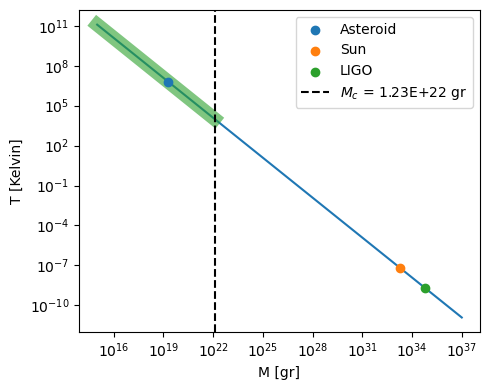

In [28]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(1, 1, 1)

ax1.loglog(BH_masses, HR_temperatures)
ax1.loglog(BH_masses[HR_temperatures>1e4], HR_temperatures[HR_temperatures>1e4], ls='-',\
           c='tab:green', lw=10, alpha=0.6)

for i, items in enumerate(list(example_masses)):
    ax1.scatter(example_masses[items]*M_SOLAR_2_GRAMS, example_T[i], label=f"{items}", zorder=100)

mass_critical_T = BH_mass_from_Hawking_temperature(1e4, units='cgs')
ax1.axvline(x=mass_critical_T, ls='--', c='black', label = fr'$M_c$ = {(mass_critical_T):.2E} gr')
ax1.set_xlabel(r"M [gr]")
ax1.set_ylabel("T [Kelvin]")


plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

**NB**: The critical temperature for atomic cooling haloes to avoid collapse is $T\sim 10^4$ K, which corresponds to masses of $M \sim 10^{22}$ gr.

-------------------------------------

# Blackbody Spectra <a name="Blackbody"></a>

In this section we calculate the HR blackbody spectrum for a given BH mass:

$$
B_{\nu}=f_{\rm eff}\frac{2h\nu^3}{c^2}\frac{1}{\exp[h\nu/k_{B}T]-1}=f_{\rm eff}\frac{2h\nu^3}{c^2}\frac{1}{\exp[16\pi^2 G M_{\rm BH}\nu /c^3]-1},
$$

where $f_{\rm eff}$ is an efficiency factor signifying the percentage of HR that is emitted in primary photons.

Return to TOC [here](#toc).

In [29]:
frequencies = np.linspace(1, 3e15, 100)
Temperatures = [1000, 3000, 5780, 8000, 10_000]

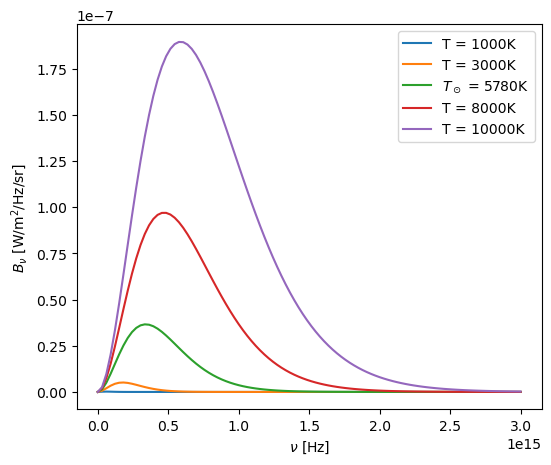

In [32]:
fig= plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

for T in Temperatures:
    if T==5780:
        ax.plot(frequencies, Spectrum_freq_temperature(frequencies, T),\
                label = fr"$T_\odot$ = {T}K")
    else:
        ax.plot(frequencies, Spectrum_freq_temperature(frequencies, T), label = f"T = {T}K")
    

ax.set_xlabel(r"$\nu$ [Hz]")
ax.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")

plt.legend()
plt.show()

In [33]:
example_temp = {"CMB": 2.76, "Sun": 5780}  # Test T in K

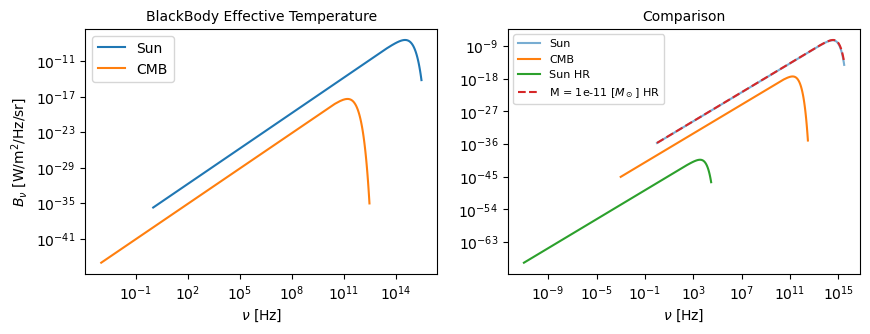

In [38]:
fig= plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)


ax1.loglog(frequencies, Spectrum_freq_temperature(frequencies, example_temp["Sun"]),\
        label = "Sun")
ax1.loglog(frequencies/1e3, Spectrum_freq_temperature(frequencies/1e3, example_temp["CMB"]),\
        label = "CMB")
ax1.set_xlabel(r"$\nu$ [Hz]")
ax1.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")
ax1.set_title("BlackBody Effective Temperature", fontsize=10)
ax1.legend()

ax2.loglog(frequencies, Spectrum_freq_temperature(frequencies, example_temp["Sun"]),\
        label = "Sun", alpha=0.6)
ax2.loglog(frequencies/1e3, Spectrum_freq_temperature(frequencies/1e3, example_temp["CMB"]),\
        label = "CMB")
ax2.loglog(frequencies/1e11, Spectrum_freq_mass(frequencies/1e11, example_masses["Sun"]),\
        label = "Sun HR")
ax2.loglog(frequencies, Spectrum_freq_mass(frequencies, 1e-11),\
        label = r"M = 1e-11 [$M_\odot$] HR", ls='--')
ax2.set_xlabel(r"$\nu$ [Hz]")
ax2.set_title("Comparison", fontsize=10)
ax2.legend(fontsize=8)

plt.tight_layout
plt.show()

### Blackbody spectrum for multiple masses

In [40]:
list_of_masses = [1, 2, 3, 4]
frequencies = np.linspace(1, 1e4, 100)
blackbody_spectrum = total_blackbody_spectrum(frequencies, list_of_masses)

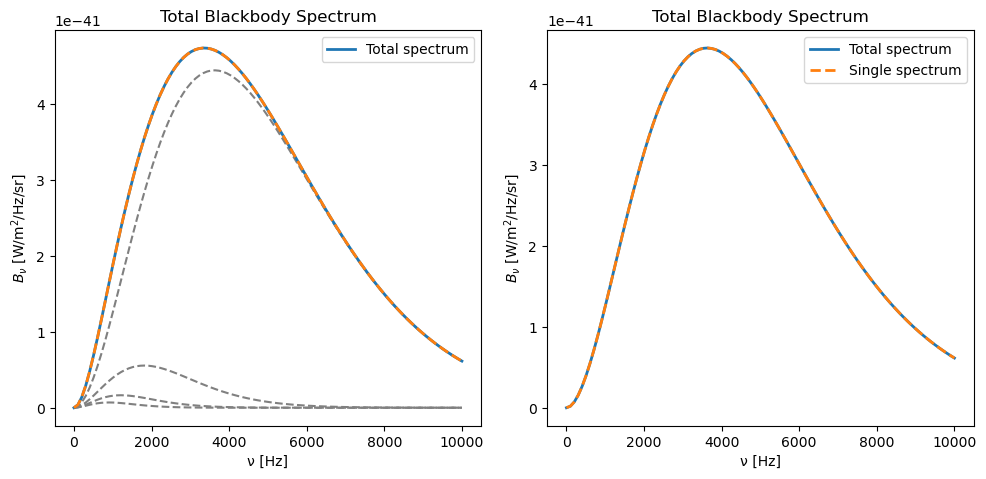

In [43]:
fig = plt.figure(figsize = (10, 9))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

total_spectrum = 0

for mass in list_of_masses:
    ax1.plot(frequencies, Spectrum_freq_mass(frequencies, mass), c='grey', ls='--')
    total_spectrum += Spectrum_freq_mass(frequencies, mass)
        
ax1.plot(frequencies, blackbody_spectrum, label='Total spectrum', lw=2)
ax1.plot(frequencies, total_spectrum, ls='--', c='tab:orange', lw=2)
ax1.set_xlabel('ν [Hz]')
ax1.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")
ax1.set_title('Total Blackbody Spectrum')
ax1.legend()

## Testing that the multiple spectrum from 1 mass is the same as the single spectrum
ax2.plot(frequencies, total_blackbody_spectrum(frequencies, [1]), label='Total spectrum', lw=2)
ax2.plot(frequencies, Spectrum_freq_mass(frequencies, 1), label='Single spectrum', lw=2, ls='--')
ax2.set_xlabel('ν [Hz]')
ax2.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")
ax2.set_title('Total Blackbody Spectrum')
ax2.legend()

plt.tight_layout()
plt.show()

### Greybody factors check

In the original calculation of Hawking radiation the spectrum of emitted particles is

$$
N_\nu = \Gamma_\nu\frac{2h\nu^3}{c^2}\frac{1}{e^{h \nu/k_B T}-1},
$$

where the $\Gamma_\nu$ term signifies the *greybody factor*, that modifies the spectrum from a perfect blackbody. It acts as the absorption coefficient for scattering of a scalar field off the gravitational field of a BH.

Below we calculate the criteria that make these terms important and discuss how to model them.

-------------------------------

# Connection of energy and frequency/wavelength of photons <a name="Photons"></a>

In this section, we transform photons of specific energy their respective frequency or wavelength, and vice versa. This is useful to connect the standard energy range of the LW photons to their respective frequencies.

Return to TOC [here](#toc).

Sanity checks:

1) For 1 Hz, we get $4.136 \cdot 10^{-15}$ eV.
2) For 1 nm, we get $1239.8$ eV.

In [45]:
print(f"For 1 Hz, we get {energy_from_photons(nu=1)} eV.")
print(f"For 1 nm, we get {energy_from_photons(wavelength=1)} eV.")

For 1 Hz, we get 4.13599298763e-15 eV.
For 1 nm, we get 1239.9395040323614 eV.


In [46]:
print(f"For 4.136e-15 eV, we get {photons_from_energy(4.136e-15)[0]} Hz.")
print(f"For 1239.8 eV, we get {photons_from_energy(1239.8)[1]} nm.")

For 4.136e-15 eV, we get 1.0000016954501667 Hz.
For 1239.8 eV, we get 1.0001125214005173 nm.


The Lyman-Werner photons correspond to the $11.2-13.6$ eV energy range. What is the frequency and wavelength range?

In [47]:
nu_low, lamda_low = photons_from_energy(11.2)
nu_high, lamda_high = photons_from_energy(13.6)

In [32]:
print(f"The low energy (11.2 eV) corresponds to: {np.round(nu_low, 2)} Hz, and {np.round(lamda_low, 2)} nm.")
print(f"The high energy (13.2 eV) corresponds to: {np.round(nu_high, 2)} Hz, and {np.round(lamda_high, 2)} nm.")

The low energy (11.2 eV) corresponds to: 2707934958665828.0 Hz, and 110.71 nm.
The high energy (13.2 eV) corresponds to: 3288206735522791.5 Hz, and 91.17 nm.


Checking Wien's law, for peak frequency of the spectrum, with out blackbody spectra.

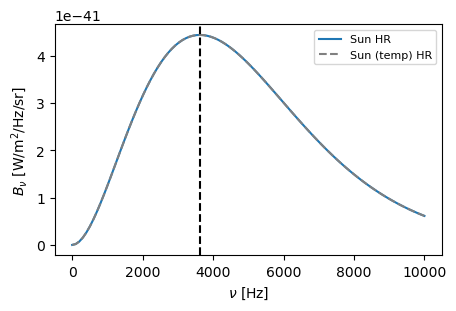

In [48]:
frequencies = np.linspace(1, 1e4, 100)

fig= plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(111)

ax1.plot(frequencies, Spectrum_freq_mass(frequencies, example_masses["Sun"]),\
        label = "Sun HR")
ax1.plot(frequencies, Spectrum_freq_temperature(frequencies,\
                                                     Hawking_temperature_from_mass(example_masses["Sun"])),\
        label = "Sun (temp) HR", ls='--', c='grey')

# We calculate the peak of the spectrum using Wien's law (for a given mass)
ax1.axvline(x = photons_from_energy(peak_HR_energy_from_mass(example_masses["Sun"]))[0], ls='--', c='black')

ax1.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")
ax1.set_xlabel(r"$\nu$ [Hz]")
ax1.legend(fontsize=8)

plt.tight_layout
plt.show()

----------------------------------------

# Age with redshift <a name="time_redshift"></a>

In this section we connect the age of the universe since the BB, with redshift. We combine this with PBH formation and evolution due to Hawking evaporation (in the next section).

Return to TOC [here](#toc).

__Sanity checks__: We compare the `Astropy` functions with the analytical `age_at_redshift`. We consider a flat LCDM universe with $\Omega_m = 0.3$ and $H_0 = 70$ Mpc/km/s.

In [49]:
# Age of the universe today in Gyrs
cosmo.age(0).value, age_at_redshift(0)

(13.466983947061877, 13.494854310342225)

In [50]:
redshift_range = np.linspace(10, 30, 100)
redshift_sparse = redshift_range[::20]

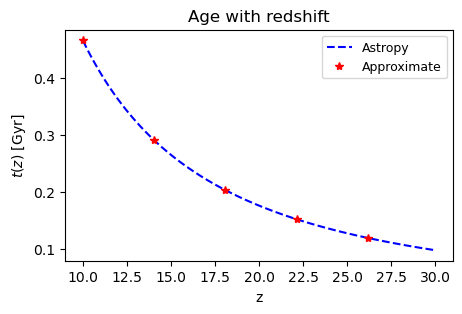

In [53]:
fig = plt.figure(figsize = (5, 3))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(redshift_range, cosmo.age(redshift_range).value, label = 'Astropy', c='blue', ls='--')
ax1.plot(redshift_sparse, age_at_redshift(redshift_sparse), label = 'Approximate', c='red', ls=' ', marker='*')

ax1.set_ylabel('$t(z)$ [Gyr]')
ax1.set_xlabel('z')
ax1.set_title('Age with redshift')
ax1.legend(fontsize = 9)

plt.show()

In [6]:
example_eras = {"BBN": 1e8, "MD=RD": 3400, "CMB": 1100, "Reionisation": 15, "MD=ΛD": 0.4}  # Eras in redshift

In [7]:
redshift_range = np.logspace(-1, 9, 500)
t_age = age_at_redshift(redshift_range)

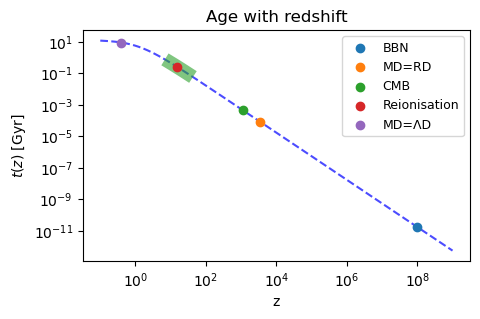

In [8]:
fig = plt.figure(figsize = (5, 3))
ax1 = fig.add_subplot(1, 1, 1)

ax1.loglog(redshift_range, t_age, c='blue', ls='--', alpha=0.7)

bool_redshift_range = (redshift_range>10)*(redshift_range<30)
ax1.loglog(redshift_range[bool_redshift_range], t_age[bool_redshift_range], ls='-',\
           c='tab:green', lw=10, alpha=0.6)

for i, items in enumerate(list(example_eras)):
    ax1.scatter(example_eras[items], age_at_redshift(example_eras[items]), label=f"{items}", zorder=100)

ax1.set_ylabel('$t(z)$ [Gyr]')
ax1.set_xlabel('z')
ax1.set_title('Age with redshift')
ax1.legend(fontsize = 9)

plt.show()

We are interested in BHs, that will emit at the critical temperature, at the redshift range of the formation of the seed BHs.

--------------------------------------------------------------------

# Evaporation time due to HR <a name="BH_evaporation"></a>

BHs that emit HR evolve with time, since they lose energy (mass). We quantify this evolution and compare with common eras of the universe!

It is worth noting that the evaporation time of a BH will depend on its emission spectrum, i.e. it will radiate stronger at its last stages and as a consequence evolve faster. Also, the HR of a BH can include other particles than photons, which will make the evolution slightly different (faster).

Below, we consider two cases:

- `evaporation_time_from_mass`: involves only photon emission
- `effective_evaporation_time_from_mass`: involves photons + other particles (this is based on [[here](https://arxiv.org/pdf/2203.05743)].

**NB**: Beware, both functions accept $M_{\rm BH}$ in $M_\odot$.

The standard `evaporation_time_from_mass` is given by:

$$
t_{\rm ev}= \frac{15360 \pi G^2 M_{\rm BH}^3}{3 \hbar c^4} = 2.1\times10^{67}\, \left(\frac{M_{\rm BH}}{M_\odot}\right)^3 \: {\rm yr}.
$$

Return to TOC [here](#toc).

__Sanity check__: Comparison with analytical calculations: we expect for $1 M_\odot$ black hole, an evaporation time of $\sim 2 \cdot 10^{67}$ years.

In [9]:
print(f'The t_HR for a 1 Mo BH is: {evaporation_time_from_mass(1)*1e9} years.')
print(f'The effective t_HR for a 1 Mo BH is: {effective_evaporation_time_from_mass(1)*1e9} years.')
print(f'Then t_HR is {evaporation_time_from_mass(1)/effective_evaporation_time_from_mass(1)} bigger than t_eff_HR.')

The t_HR for a 1 Mo BH is: 2.1043645818117622e+67 years.
The effective t_HR for a 1 Mo BH is: 2.1043645817433174e+67 years.
Then t_HR is 1.000000000032525 bigger than t_eff_HR.


The difference in time evolution is more profound for *smaller masses*:

In [10]:
print(f'The t_HR for a 5e-20 Mo BH is: {evaporation_time_from_mass(5e-20)/1e9} Gyears.')
print(f'The t_HR for a 1e-19 Mo BH is: {evaporation_time_from_mass(1e-19)/1e9} Gyears.')

The t_HR for a 5e-20 Mo BH is: 2.6304557272647022 Gyears.
The t_HR for a 1e-19 Mo BH is: 21.043645818117618 Gyears.


As a first step, we compare the two evaporation times with the results in [[2312.15062](https://arxiv.org/pdf/2312.15062)], (Section B, p.11). 

**NB**: To find evaporation at similar times, we are using different initial masses ($4$ times bigger for $t_{\rm eff}$, since the extra emission allows for BHs to evaporate faster).

In [33]:
## Create mass range and transform to solar masses.
mass_range = (np.linspace(1.4, 2.2, 10)*2.5e13)/M_SOLAR_2_GRAMS
mass_range_eff = (np.linspace(1.4, 2.2, 10)*1e14)/M_SOLAR_2_GRAMS

## Calculate the evaporation time in two cases.
t_evap = evaporation_time_from_mass(mass_range)

t_evap_eff = np.zeros_like(mass_range_eff)
for idx, Mo in enumerate(mass_range_eff):
    t_evap_eff[idx] = effective_evaporation_time_from_mass(Mo)

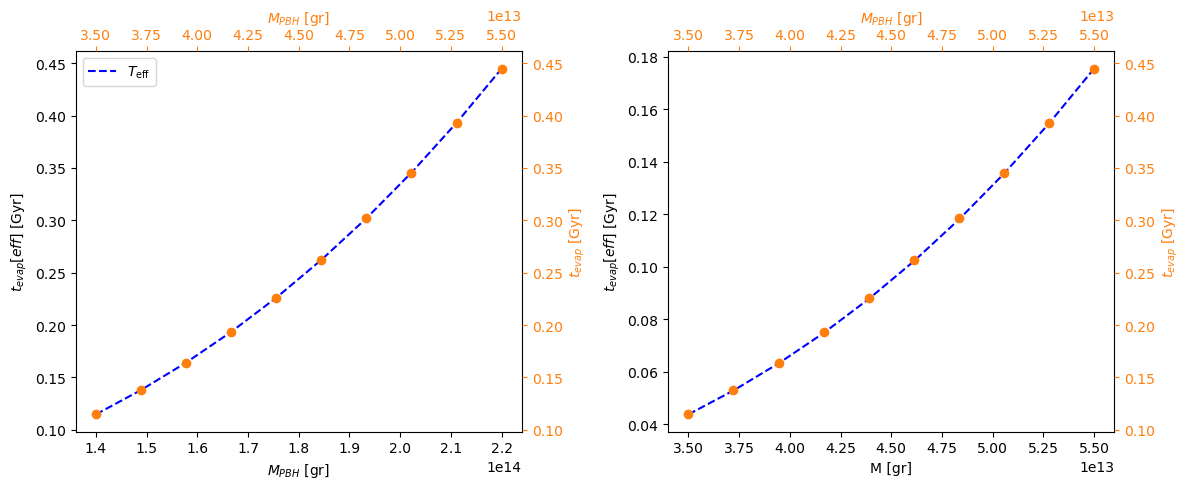

In [34]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(121, label="2", frame_on=False)

ax3 = fig.add_subplot(1, 2, 2)
ax4=fig.add_subplot(122, label="2", frame_on=False)


### Grams
ax1.plot(mass_range_eff*M_SOLAR_2_GRAMS, t_evap, c='blue',\
         ls='--', label=r'$T_{\rm eff}$')
ax1.set_ylabel('$t_{evap} [eff]$ [Gyr]')
ax1.set_xlabel(r'$M_{PBH}$ [gr]')
ax1.legend()

ax2.scatter(mass_range*M_SOLAR_2_GRAMS, t_evap, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(r'$M_{PBH}$ [gr]', color="C1") 
ax2.set_ylabel(r'$t_{evap}$ [Gyr]', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")


### Solar Masses
ax3.plot(mass_range*M_SOLAR_2_GRAMS, t_evap_eff, c='blue', ls='--')
ax3.set_ylabel('$t_{evap} [eff]$ [Gyr]')
ax3.set_xlabel('M [gr]')

ax4.scatter(mass_range*M_SOLAR_2_GRAMS, t_evap, color="C1")
ax4.xaxis.tick_top()
ax4.yaxis.tick_right()
ax4.set_xlabel(r'$M_{PBH}$ [gr]', color="C1") 
ax4.set_ylabel(r'$t_{evap}$ [Gyr]', color="C1")       
ax4.xaxis.set_label_position('top') 
ax4.yaxis.set_label_position('right') 
ax4.tick_params(axis='x', colors="C1")
ax4.tick_params(axis='y', colors="C1")

plt.tight_layout()
plt.show()

We now compare the evaporation times of a number of BH masses, with the different eras of the universe

In [13]:
### A number of BH masses (turned to solar for evaporation time calculation)
mass_range = 10**np.array([12., 13., 13.5, 14.])/M_SOLAR_2_GRAMS
t_evap = evaporation_time_from_mass(mass_range)

## Transform to redshifts (for given cosmology)
z_evap = z_at_value(cosmo.age, t_evap * u.Gyr, zmin=0, zmax=1e8).value

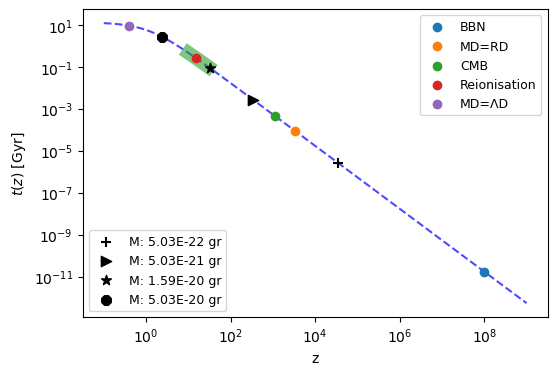

In [14]:
fig = plt.figure(figsize = (6, 4))
ax1 = fig.add_subplot(1, 1, 1)


ax1.loglog(redshift_range, t_age, c='blue', ls='--', alpha=0.7)

bool_redshift_range = (redshift_range>10)*(redshift_range<30)
ax1.loglog(redshift_range[bool_redshift_range], t_age[bool_redshift_range], ls='-',\
           c='tab:green', lw=10, alpha=0.6)

for i, items in enumerate(list(example_eras)):
    ax1.scatter(example_eras[items], age_at_redshift(example_eras[items]), label=f"{items}", zorder=100)

markers_list = ['+', '>', '*', '8']
for i, mass in enumerate(mass_range):
    ax1.scatter(z_evap[i], t_evap[i], label=f'M: {(mass):.2E} gr', marker=markers_list[i], s=55, zorder=200, c='black')   


ax1.set_ylabel('$t(z)$ [Gyr]')
ax1.set_xlabel('z')

handles, labels = ax1.get_legend_handles_labels()

second_legend = ax1.legend(handles[5:], labels[5:], fontsize = 9, loc='lower left')
ax1.add_artist(second_legend)

ax1.legend(handles[0:5], labels[0:5], fontsize = 9, loc='upper right')


plt.show()

We see that masses of the order of $\sim 10^{-20}$ gr are needed to be in the redshift range of interest. We will now look into that in more detail, by inverting the equations above and finding the masses, given an evaporation time.

We should note here that the masses of PBHs scale with formation time (since the Big Bang) as:

$$
M_{\rm PBH} \sim M_H = \frac{4}{3}\pi \rho \left( \frac{1}{H}\right)^3 \sim 10^{15} \left( \frac{t}{10^{-23}{\rm s}} \right) {\rm gr}.
$$

This means that till $1$s we will already have BHs reaching masses $10^5\ M_\odot$, which means that we can consider for all masses of interest a formation time $t_{\rm form} \rightarrow 0$.

**Sanity check**: The maximum mass of a BH that could have evaporated due to HR within the age of the Universe ($\rm \sim 13.7 \: Gyr$) is $\rm 9 \times 10^{-20} \: M_{\odot}$.

In [20]:
print(f'A BH evaporating at z=0, will have mass: {mass_from_evaporation_time(age_at_redshift(0))} Mo')

A BH evaporating at z=0, will have mass: 8.623476923929839e-20 Mo


Let's assume a redshift range of interest $z\ \epsilon\ [10, 30]$. We find the mass range that evaporates during this range:

In [3]:
### Full redshift and mass range
z_full = np.linspace(1, 50, 100)
t_evap_full = age_at_redshift(z_full)
masses_full = mass_from_evaporation_time(t_evap_full)

### Redshift range of interest
z_range_bool = (z_full>10)*(z_full<30)

### Checking the effects of the effective evaporation time
masses_eff_full = np.logspace(-18.5, -19.2, 100)
t_eff_full = np.zeros_like(masses_eff_full)
for idx, Mo in enumerate(masses_eff_full):
    t_eff_full[idx] = effective_evaporation_time_from_mass(Mo)
    
t_evap_min = np.min(t_evap_full[z_range_bool])
t_evap_max = np.max(t_evap_full[z_range_bool])

t_eff_bool = (t_eff_full>t_evap_min)*(t_eff_full<t_evap_max)
z_eff_full = z_at_value(cosmo.age, t_eff_full * u.Gyr, zmin=0, zmax=1e8).value
z_eff_range = z_at_value(cosmo.age, t_eff_full[t_eff_bool] * u.Gyr, zmin=0, zmax=1e8).value

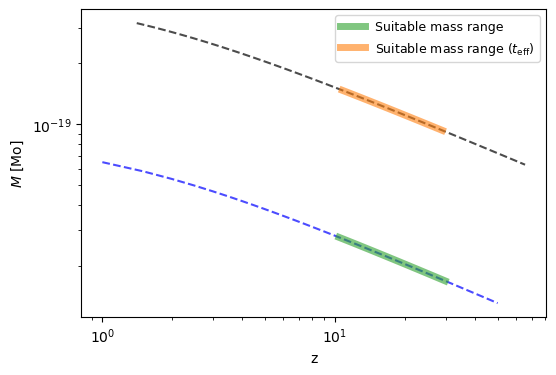

In [6]:
fig = plt.figure(figsize = (6, 4))
ax1 = fig.add_subplot(1, 1, 1)


ax1.loglog(z_full, masses_full, c='blue', ls='--', alpha=0.7)
ax1.loglog(z_full[z_range_bool], masses_full[z_range_bool], ls='-',\
           c='tab:green', lw=5, alpha=0.6, label = 'Suitable mass range')

ax1.loglog(z_eff_full, masses_eff_full, c='black', ls='--', alpha=0.7)
ax1.loglog(z_eff_range, masses_eff_full[t_eff_bool], ls='-',\
           c='tab:orange', lw=5, alpha=0.6, label = r'Suitable mass range ($t_{\rm eff}$)')

ax1.set_ylabel('$M$ [Mo]')
ax1.set_xlabel('z')
ax1.legend(fontsize = 9)


plt.show()

In [120]:
mass_range = masses_full[z_range_bool]
mass_low = np.min(mass_range)
mass_high = np.max(mass_range)

mass_eff_low = np.min(masses_eff_full[t_eff_bool])
mass_eff_high = np.max(masses_eff_full[t_eff_bool])

print(f"The min BH mass corresponding to z~30 is: {mass_low} Mo, or 10^{np.log10(mass_low*M_SOLAR_2_GRAMS)} gr.")
print(f"The max BH mass corresponding to z~10 is: {mass_high} Mo, or 10^{np.log10(mass_high*M_SOLAR_2_GRAMS)} gr.")
print()
print("For the effective evaporation time, this corresponds to:\n")
print(f"The min BH mass corresponding to z~30 is: {mass_eff_low} Mo, or 10^{np.log10(mass_eff_low*M_SOLAR_2_GRAMS)} gr.")
print(f"The max BH mass corresponding to z~10 is: {mass_eff_high} Mo, or 10^{np.log10(mass_eff_high*M_SOLAR_2_GRAMS)} gr.")

The min BH mass corresponding to z~30 is: 1.6819123899397902e-20 Mo, or 10^13.524438152971193 gr.
The max BH mass corresponding to z~10 is: 2.759670289880554e-20 Mo, or 10^13.73949198119001 gr.

For the effective evaporation time, this corresponds to:

The min BH mass corresponding to z~30 is: 9.32603346883218e-20 Mo, or 10^14.268331752821405 gr.
The max BH mass corresponding to z~10 is: 1.471217112194565e-19 Mo, or 10^14.466311550801203 gr.


So we see that a very narrow range of masses correspond to the redshifts of interest! The effective model can evaporate bigger masses at the same redshift range, since emission to all particles, can make BH evaporation more efficient.

### Half-time of mass evolution

To quantify more clearly the evolution of masses, we calculate their respective half-time, i.e. the time needed for a BH mass of $M_i$ to become $M_i/2$. 

This should give a quick estimate of mass evolution, but keep also in mind that due to the scalings of mass evolution, the latter becomes faster as the masses decrease.

The mass half-time is given by:

$$
t_{1/2} = \frac{7}{8} \frac{M_i^3}{C}, 
$$

where $C$ is:

$$
C = \frac{3}{256} \frac{c^6 \sigma}{\pi^3 G^2} \left(\frac{\hbar}{k_B} \right)^4.
$$

In [8]:
mass_range = (np.linspace(1.4, 2.2, 10)*2.5e13)/M_SOLAR_2_GRAMS


## Calculate the evaporation time.
t_evap = evaporation_time_from_mass(mass_range)

## Calculate the half-time.
t_half = mass_evolution_half_time(mass_range)

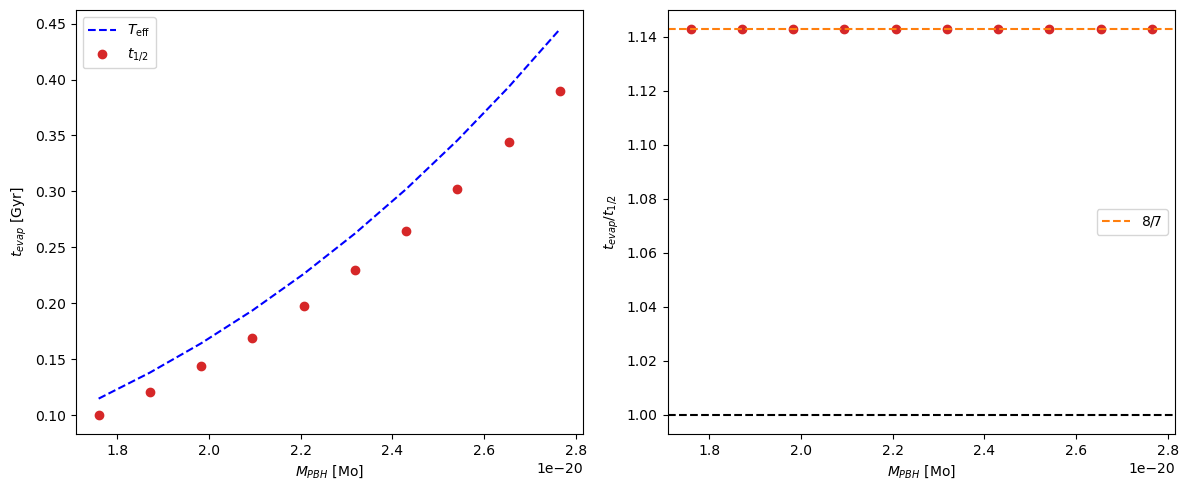

In [18]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.plot(mass_range, t_evap, c='blue',\
         ls='--', label=r'$T_{\rm eff}$')
ax1.scatter(mass_range, t_half, color="tab:red", label=r'$t_{1/2}$')

ax1.set_ylabel('$t_{evap}$ [Gyr]')
ax1.set_xlabel(r'$M_{PBH}$ [Mo]')
ax1.legend()


ax2.scatter(mass_range, t_evap/t_half, color="tab:red")
ax2.axhline(y=1, ls='--', c='black')
ax2.axhline(y=8/7, ls='--', c='tab:orange', label=r'$8/7$')

ax2.set_ylabel('$t_{evap}/t_{1/2}$')
ax2.set_xlabel(r'$M_{PBH}$ [Mo]')
ax2.legend()


plt.tight_layout()
plt.show()

**Sanity check**: Evaporation times and redshifts for given mass, and inverse.

In [11]:
z_check = 15
t_check = age_at_redshift(z_check)

print(f"At z={z_check}, the age of the universe is: {t_check} Gyr.")

At z=15, the age of the universe is: 0.26617870678164357 Gyr.


In [12]:
mass_t_check = mass_from_evaporation_time(t_check)
mass_z_check = mass_from_evaporation_redshift(z_check)

print(f"Mass from time is: {mass_t_check} [Mo]")
print(f"Mass from redshift is: {mass_z_check} [Mo]")

Mass from time is: 2.3299723953264367e-20 [Mo]
Mass from redshift is: 2.3299723953264367e-20 [Mo]


In [13]:
print(f"For `mass_t_check`, the evaporation time is: {evaporation_time_from_mass(mass_t_check)} Gyr.")
print(f"For `mass_z_check`, the evaporation time is: {evaporation_redshift_from_mass(mass_z_check)}.")

For `mass_t_check`, the evaporation time is: 0.2661787067816425 Gyr.
For `mass_z_check`, the evaporation time is: 14.977958721734419.


In [77]:
mass_range = np.logspace(-19.2, -19.8, 50)

t_evap = evaporation_time_from_mass(mass_range)/1e9  # To transform to Gyr
z_evap = z_at_value(cosmo.age, t_evap * u.Gyr, zmin=0).value

In [74]:
T_evap = Hawking_temperature_from_mass(mass_range, units='solar')

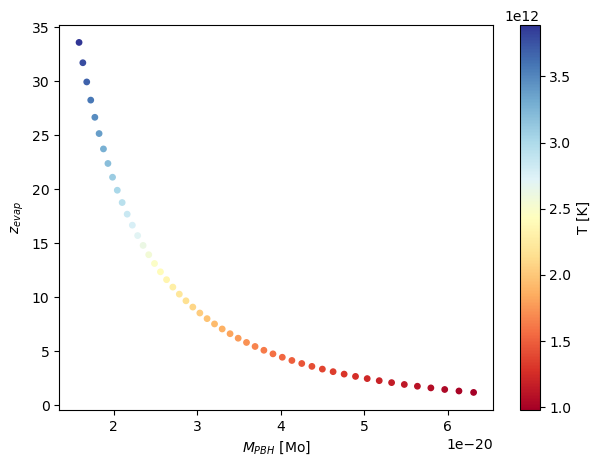

In [75]:
fig = plt.figure(figsize = (7, 5))
ax1 = fig.add_subplot(1, 1, 1)

cm = plt.cm.get_cmap('RdYlBu')
sc = ax1.scatter(mass_range, z_evap, s=15, c=T_evap, cmap=cm)

ax1.set_ylabel(r'$z_{evap}$')
ax1.set_xlabel(r'$M_{PBH}$ [Mo]')

plt.colorbar(sc, label='T [K]')
plt.show()

-------------------------------------

In [37]:
mass_range = np.logspace(-19, -20, 10)

t_evap = evaporation_time_from_mass(mass_range)/1e9  # To transform to Gyr

In [22]:
age_at_redshift(redshift_sparse)

array([12.19086367,  3.08204414,  1.47493938,  0.89957262,  0.62030967])

In [23]:
t_evap

array([21.04364582,  9.76759514,  4.53371606,  2.10436458,  0.97675951,
        0.45337161,  0.21043646,  0.09767595,  0.04533716,  0.02104365])

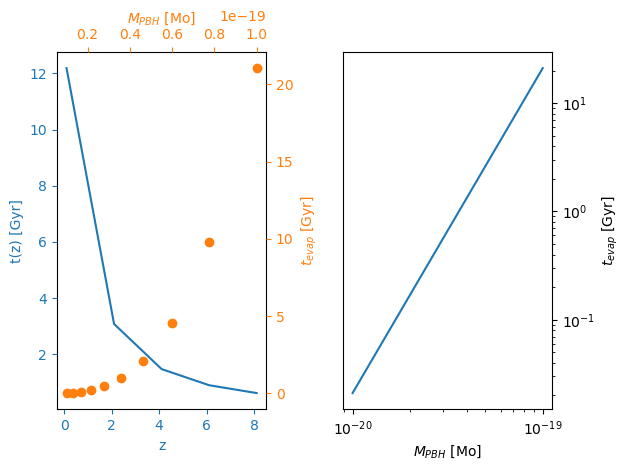

In [41]:
x_values1=[1,2,3,4,5]
y_values1=[1,2,2,4,1]

x_values2=[-1000,-800,-600,-400,-200]
y_values2=[10,20,39,40,50]

x_values3=[150,200,250,300,350]
y_values3=[10,20,30,40,50]


fig=plt.figure()
ax=fig.add_subplot(121, label="1")
ax2=fig.add_subplot(121, label="2", frame_on=False)
ax3=fig.add_subplot(122)


ax.plot(redshift_sparse, age_at_redshift(redshift_sparse), color="C0")
ax.set_xlabel("z", color="C0")
ax.set_ylabel("t(z) [Gyr]", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.scatter(mass_range, t_evap, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(r'$M_{PBH}$ [Mo]', color="C1") 
ax2.set_ylabel(r'$t_{evap}$ [Gyr]', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")


ax3.loglog(mass_range, t_evap)
ax3.set_xlabel(r'$M_{PBH}$ [Mo]') 
ax3.set_ylabel(r'$t_{evap}$ [Gyr]')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right') 

plt.tight_layout()
plt.show()

In [62]:
z_range = np.logspace(-2, 5, 50)
# mass_range = np.logspace(-19.4, -19.9, 8)

mass_range = np.logspace(-20, -19, 8)


Z, M = np.meshgrid(z_range, mass_range)

# t_evap = evaporation_time_from_mass(mass_range)/1e9  # To transform to Gyr
# z_evap = z_at_value(Planck18.age, t_evap * u.Gyr, zmin=0).value

In [63]:
T_evolution = np.zeros((len(z_range), len(mass_range)))

for i, z_val in enumerate(z_range):
    for j, M_val in enumerate(mass_range):
        M_evolved = mass_evolution_from_HR(M_val, 1e3, z_val)
        
        if M_evolved>0:
            T_evolution[i, j] = Hawking_temperature_from_mass(M_evolved)

In [64]:
T_evolution[:,0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00927223e+13, 7.58725740e+12, 6.85945843e+12, 6.52821815e+12,
       6.35404426e+12, 6.25614714e+12, 6.19916012e+12, 6.16533000e+12,
       6.14501738e+12, 6.13273903e+12, 6.12528741e+12, 6.12075424e+12,
       6.11799252e+12, 6.11630856e+12, 6.11528122e+12, 6.11465428e+12,
       6.11427161e+12, 6.11403801e+12, 6.11389540e+12, 6.11380834e+12,
       6.11375518e+12, 6.11372273e+12])

In [33]:
M_evolved = mass_evolution_from_HR(1e-14, 1e3, 1e3)
M_evolved

9.99999999999998e-15

In [49]:
M_evolved = mass_evolution_from_HR(1e-19, 1e3, 1e-2)
M_evolved

7.148852559016955e-20

**MK NOTE**: Check units here!

In [3]:
initial_mass_with_Tcrit_and_z(10, 1e4)

1.226900670594014e+19

In [4]:
z_range = np.linspace(10, 30)

initial_mass_with_Tcrit_and_z(z_range, 1e4)

array([1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19, 1.22690067e+19, 1.22690067e+19,
       1.22690067e+19, 1.22690067e+19])

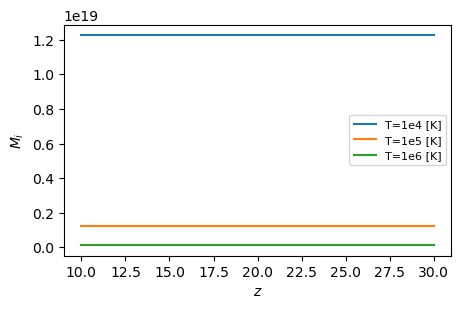

In [9]:
fig= plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(111)


for T in np.arange(4, 7):
    ax1.plot(z_range, initial_mass_with_Tcrit_and_z(z_range, 10**T),\
            label = f"T=1e{T} [K]")

ax1.set_ylabel(r"$M_i$")
ax1.set_xlabel(r"$z$")
ax1.legend(fontsize=8)

plt.show()

# Blackbody spectrum evolution with redshift

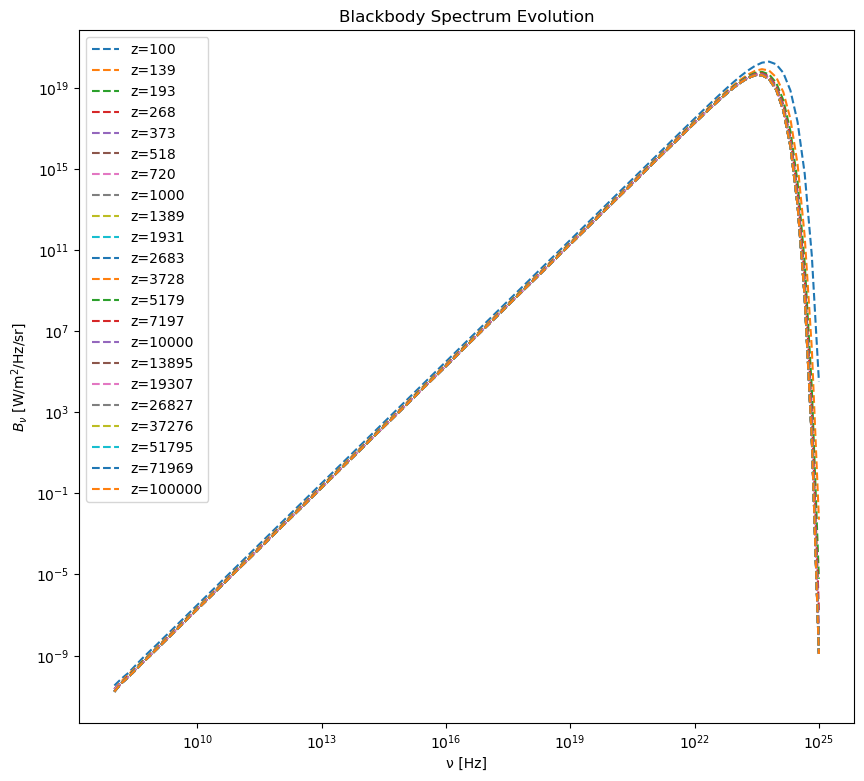

In [65]:
frequencies = np.logspace(8, 25, 100)

fig = plt.figure(figsize = (10, 9))
ax1 = fig.add_subplot(111)

for idx, T in enumerate(T_evolution[:, 0]):
    if T>0:
        ax1.loglog(frequencies, Spectrum_freq_temperature(frequencies, T), ls='--', label=f'z={round(z_range[idx])}')
        
ax1.set_xlabel('ν [Hz]')
ax1.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")
ax1.set_title('Blackbody Spectrum Evolution')
ax1.legend()

plt.show()

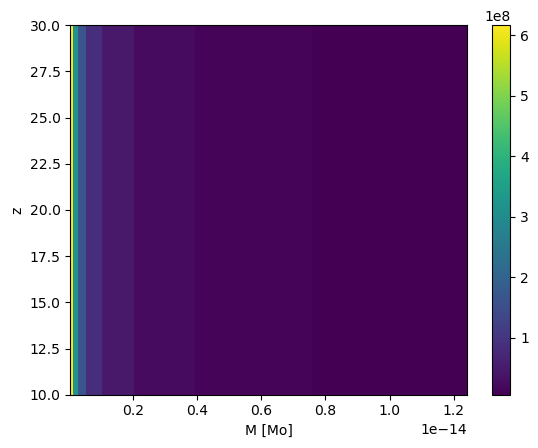

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

p = ax1.pcolormesh(M, Z, T_evolution.T)
# ax1.plot(mass_range, z_evap, ls='-', c='red', lw=4)
ax1.set_ylim(10, 30)
ax1.set_xlabel('M [Mo]')
ax1.set_ylabel('z')

plt.colorbar(p)
plt.show()

## Mass evolution of BHs due to HR

Due to the emission of HR, BHs reduce their mass. For a Schwarzschild BH, the rate of mass loss follows:

$$
\frac{dM}{dt} = -\frac{A}{M^2},\ {\rm with}\ A = ...
$$

Solving this equation, assuming BH formation time close to $t = 0$, gives a relation between masses and redshifts:

$$
M_f = \left[M_i^3 - C t(z, H_0, \Omega_m) \right]^{1/3}
$$

In [61]:

mass_evolution_from_HR(mass_range[0], 1000, time_units='redshift')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Primordial Black Holes Mass Functions <a name="PBH_masses"></a>

Primordial BHs can form when overdensities collapse in the early Universe. An estimate of their mass at formation is given by comparing the density of the universe with the density connected with a black hole of mass $M$ inside the Hubble radius. This gives:

$
M \sim \frac{c^3 t}{G} \sim 10^{15} \left(\frac{t}{10^{-23} {\rm s}}\right) {\rm gr}.
$

This estimate tells us that as soon as $1$ s after the Big Bang, we can have PBHs with masses of the order of $10^5 M_{\odot}$. So for our case, we can assume that a range of masses of PBHs would already be present at $z \sim 30$ or smaller, when they need to be present to provide the necessary radiation for DCBHs formation.

PBHs at formation time can have a range of masses, and a distribution that is very much dependent on the model. Useful link for more details [[here](https://arxiv.org/pdf/2402.03934.pdf)].

Here we study a:

- Lognormal mass function
- Power-law mass function
- Broken Power-law mass function
- Critical Collapse mass function

We initially reproduce the figure in the [[paper](https://arxiv.org/pdf/2402.03934.pdf)] (above). This means that we use a different mass range than what we expect for our scenario.

Return to TOC [here](#toc).

__1. Lognormal Mass Function__

In [73]:
pbh_mass_range = np.linspace(0.05, 20, 100)
lognormal_mass_function = lognormal_PBH_mass_function(pbh_mass_range, 50, 2)

In [74]:
masses_randoms = np.random.uniform(0.05, 20, size=5000)
weights = lognormal_PBH_mass_function(masses_randoms, 50, 2)/np.sum(lognormal_PBH_mass_function(masses_randoms, 50, 2))
random_masses_lognormal = np.random.choice(masses_randoms, replace=True, size=4000, p=weights)

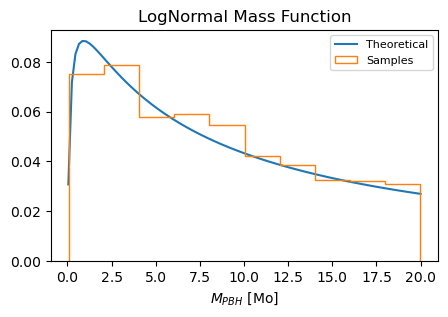

In [75]:
fig= plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(111)

ax1.plot(pbh_mass_range, lognormal_mass_function*3,\
        label = "Theoretical")

ax1.hist(random_masses_lognormal, density=True, histtype='step',\
        label = "Samples")

ax1.set_title('LogNormal Mass Function')
ax1.set_xlabel(r"$M_{PBH}$ [Mo]")
ax1.legend(fontsize=8)

plt.tight_layout
plt.show()

__2. Power-law Mass Function__

In [45]:
PBH_mass_range = np.linspace(5, 20, 100)
power_law_mass_function = power_law_PBH_mass_function(PBH_mass_range, 10, 2)

In [46]:
random_masses = np.random.uniform(5, 20, size = 5000)
weights = power_law_PBH_mass_function(random_masses, 10, 2)/np.sum(power_law_PBH_mass_function(random_masses, 10, 2))
random_masses_power_law = np.random.choice(random_masses, replace = True, size = 4000, p = weights)

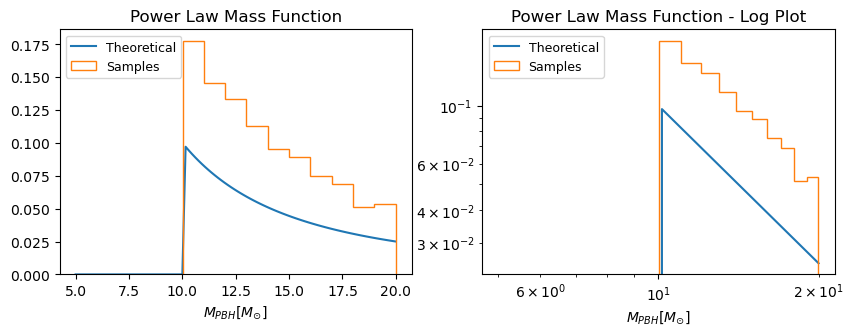

In [47]:
fig = plt.figure(figsize = (10, 7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.plot(PBH_mass_range, power_law_mass_function, label = 'Theoretical')
ax1.hist(random_masses_power_law, density = True, histtype = 'step', label = 'Samples')
ax1.set_title('Power Law Mass Function')
ax1.set_xlabel('$M_{PBH} [M_{\odot}]$')
ax1.legend(fontsize = 9)

ax2.loglog(PBH_mass_range, power_law_mass_function, label = 'Theoretical')
ax2.hist(random_masses_power_law, density = True, histtype = 'step', label = 'Samples')
ax2.set_xlabel('$M_{PBH} [M_{\odot}]$')
ax2.set_title('Log Plot')
ax2.set_title('Power Law Mass Function - Log Plot')
ax2.legend(fontsize = 9)


plt.tight_layout
plt.show()

__3. Broken Power-law Mass Function__

In [48]:
PBH_mass_range = np.linspace(0.05, 20, 100)
broken_pl_mass_function = broken_pl_PBH_mass_function(PBH_mass_range, 10, 1, 2)

In [49]:
random_masses = np.random.uniform(0.05, 20, size = 5000)
weights = broken_pl_PBH_mass_function(random_masses, 10, 1, 2)/np.sum(broken_pl_PBH_mass_function(random_masses, 10, 1, 2))
random_masses_broken_pl = np.random.choice(random_masses, replace = True, size = 4000, p = weights)

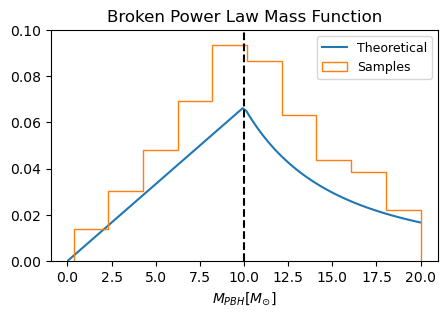

In [50]:
fig = plt.figure(figsize = (5, 3))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(PBH_mass_range, broken_pl_mass_function, label = 'Theoretical')
ax1.hist(random_masses_broken_pl, density = True, histtype = 'step', label = 'Samples')

ax1.set_xlabel('$M_{PBH} [M_{\odot}]$')
ax1.set_title('Broken Power Law Mass Function')
ax1.legend(fontsize = 9)
ax1.set_ylim([0, 0.1])

ax1.axvline(x = 10, color = 'black', linestyle = '--')

plt.tight_layout
plt.show()

__4. Critical Collapse Mass Function__

In [51]:
PBH_mass_range = np.linspace(0.05, 20, 100)
crit_collapse_mass_function = crit_collapse_PBH_mass_function(PBH_mass_range, 10, 1.5)

In [52]:
random_masses = np.random.uniform(0.05, 20, size = 5000)
weights = crit_collapse_PBH_mass_function(random_masses, 10, 1.5)/np.sum(crit_collapse_PBH_mass_function(random_masses, 10, 1.5))
random_masses_crit_collapse = np.random.choice(random_masses, replace = True, size = 4000, p = weights)

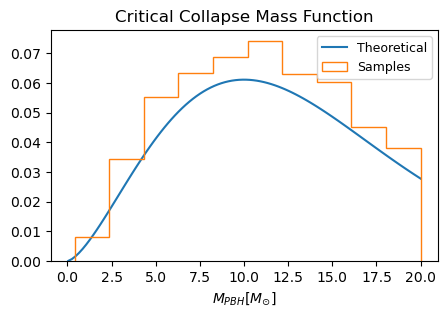

In [53]:
fig = plt.figure(figsize = (5, 3))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(PBH_mass_range, crit_collapse_mass_function, label = 'Theoretical')
ax1.hist(random_masses_crit_collapse, density = True, histtype = 'step', label = 'Samples')

ax1.set_xlabel('$M_{PBH} [M_{\odot}]$')
ax1.set_title('Critical Collapse Mass Function')
ax1.legend(fontsize = 9)

plt.tight_layout
plt.show()

### Comparison of PBH mass functions

In [63]:
PBH_mass_range = np.linspace(1, 100, 200)
lognormal_mass_function = normalise(lognormal_PBH_mass_function(PBH_mass_range, 30, 1))
power_law_mass_function = normalise(power_law_PBH_mass_function(PBH_mass_range, 8, 1.5))
broken_pl_mass_function = normalise(broken_pl_PBH_mass_function(PBH_mass_range, 30, 0.2, 2))
crit_collapse_mass_function = normalise(crit_collapse_PBH_mass_function(PBH_mass_range, 20, 1))

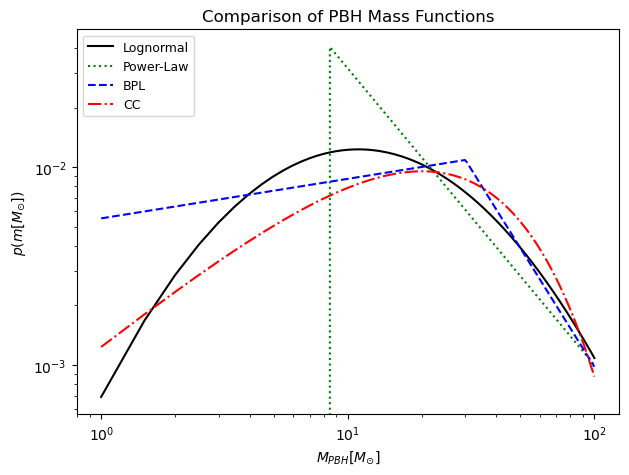

In [64]:
fig = plt.figure(figsize = (7, 5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.loglog(PBH_mass_range, lognormal_mass_function, label = 'Lognormal', c='black')
ax1.loglog(PBH_mass_range, power_law_mass_function, label = 'Power-Law', c='green', ls=':')
ax1.loglog(PBH_mass_range, broken_pl_mass_function, label = 'BPL', c='blue', ls='--')
ax1.loglog(PBH_mass_range, crit_collapse_mass_function, label = 'CC', c='red', ls='-.')

ax1.set_ylabel('$p(m [M_{\odot}])$')
ax1.set_xlabel('$M_{PBH} [M_{\odot}]$')
ax1.set_title('Comparison of PBH Mass Functions')
ax1.legend(fontsize = 9, loc='upper left')


plt.show()

#### Total blackbody spectrum from random masses selected from the different mass functions

In [84]:
frequencies = np.linspace(1, 1e7, 1000)

blackbody_spectrum_ln = total_blackbody_spectrum(frequencies, random_masses_lognormal)
blackbody_spectrum_pl = total_blackbody_spectrum(frequencies, random_masses_power_law)
blackbody_spectrum_pbl = total_blackbody_spectrum(frequencies, random_masses_broken_pl)
blackbody_spectrum_cc = total_blackbody_spectrum(frequencies, random_masses_crit_collapse)

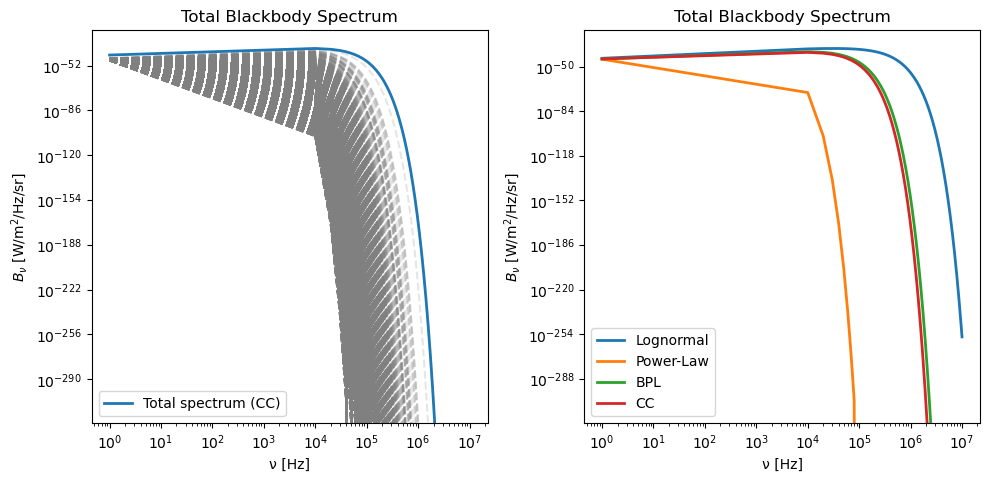

In [85]:
fig = plt.figure(figsize = (10, 9))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

for mass in random_masses_crit_collapse:
    ax1.loglog(frequencies, Spectrum_freq_mass(frequencies, mass), c='grey', ls='--', alpha=0.2)
        
ax1.loglog(frequencies, blackbody_spectrum_cc, label='Total spectrum (CC)', lw=2)
ax1.set_xlabel('ν [Hz]')
ax1.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")
ax1.set_title('Total Blackbody Spectrum')
ax1.legend()


ax2.loglog(frequencies, blackbody_spectrum_ln, label='Lognormal', lw=2)
ax2.loglog(frequencies, blackbody_spectrum_pl, label='Power-Law', lw=2)
ax2.loglog(frequencies, blackbody_spectrum_pbl, label='BPL', lw=2)
ax2.loglog(frequencies, blackbody_spectrum_cc, label='CC', lw=2)

ax2.set_xlabel('ν [Hz]')
ax2.set_ylabel(r"$B_{\nu}$ [W/m$^2$/Hz/sr]")
ax2.set_title('Total Blackbody Spectrum')
ax2.legend()


plt.tight_layout()
plt.show()

# Luminosity for DCBHs

The presence of SMBHs with masses in the region of $10^9 M_\odot$ at the first billion years of the universe requires the growth or formation of massive BHs at high redshifts ($z>10$). There are various channels for the production of massive BHs, but in this project 

Lyman-Werner background: $11.2-13.6$ eV

In [39]:
# Finding the frequency range that corresponds to this energy range

E_low = 11.2
E_high = 13.6

nu_low = photons_from_energy(E_low)[0]
nu_high = photons_from_energy(E_high)[0]

print(f"The photon energy: {E_low} eV correspond to: {nu_low} Hz")
print(f"The photon energy: {E_high} eV correspond to: {nu_high} Hz")

The photon energy: 11.2 eV correspond to: 2707934958665828.0 Hz
The photon energy: 13.6 eV correspond to: 3288206735522791.5 Hz


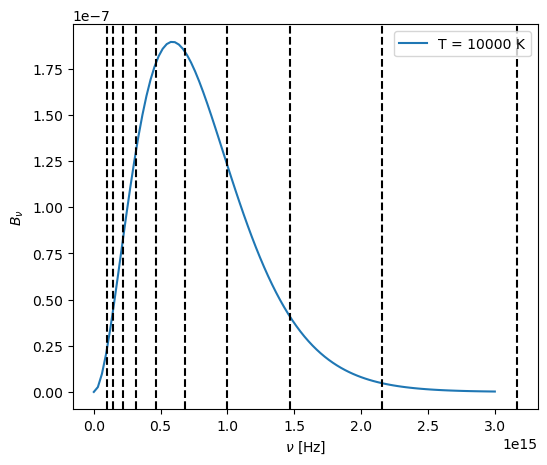

In [40]:
Radius = 20
Temp = 10000

frequencies = np.linspace(1, 3e15, 100)
max_frequencies = np.logspace(14, 15.5, 10)

fig= plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.plot(frequencies, Spectrum_freq_temperature(frequencies, Temp), label = f"T = {Temp} K")

for max_nu in max_frequencies:
    ax.axvline(x=max_nu, ls='--', c='black')

ax.set_xlabel(r"$\nu$ [Hz]")
ax.set_ylabel(r"$B_{\nu}$")

plt.legend()
plt.show()

In [41]:
v_min = 1

integral_lum_quad = np.zeros_like(max_frequencies)
integral_lum_simpson = np.zeros_like(max_frequencies)

for i, freq in enumerate(max_frequencies):
    integral_lum_quad[i] = 4*pi**2*Radius**2*quad(Spectrum_freq_temperature, v_min, freq, args=(Temp))[0]
    frequencies = np.linspace(v_min, freq, 100)
    integral_lum_simpson[i] = 4*pi**2*Radius**2*simpson(Spectrum_freq_temperature(frequencies, Temp), frequencies)

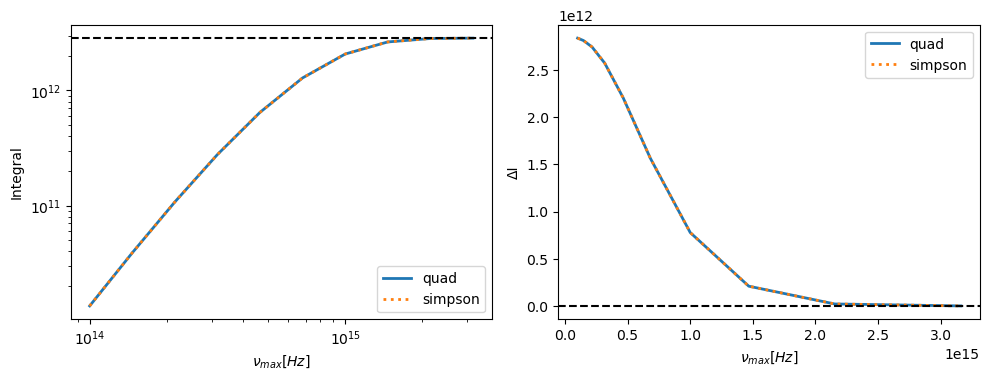

In [42]:
fig = plt.figure(figsize = (10, 7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.loglog(max_frequencies, integral_lum_quad, label='quad', lw=2)
ax1.loglog(max_frequencies, integral_lum_simpson, label='simpson', lw=2, ls=':')
ax1.axhline(y = theoretical_lum(Radius, Temp), color = 'black', linestyle = '--')
ax1.set_xlabel('$ν_{max} [Hz]$')
ax1.set_ylabel('Integral')
ax1.legend()

ax2.plot(max_frequencies, theoretical_lum(Radius, Temp) - integral_lum_quad, label='quad', lw=2)
ax2.plot(max_frequencies, theoretical_lum(Radius, Temp) - integral_lum_simpson, label='simpson', lw=2, ls=':')
ax2.axhline(y = 0, color = 'black', linestyle = '--')
ax2.set_xlabel('$ν_{max} [Hz]$')
ax2.set_ylabel('ΔI')
ax2.legend()

plt.tight_layout()
plt.show()

__Integrating at a specific frequency range__

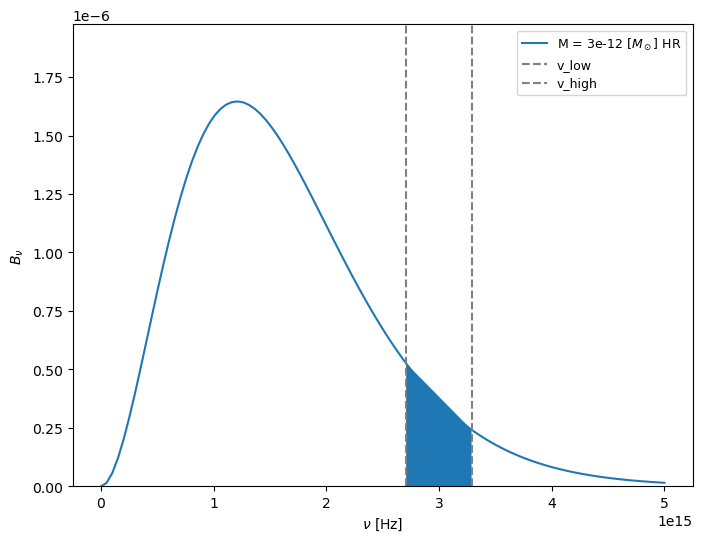

In [43]:
frequencies = np.linspace(1, 5e15, 100)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(frequencies, Spectrum_freq_mass(frequencies, 3e-12), label = r"M = 3e-12 [$M_\odot$] HR")
ax.fill_between([nu_low, nu_high], [Spectrum_freq_mass(nu_low, 3e-12), Spectrum_freq_mass(nu_high, 3e-12)], 0)
ax.axvline(x=nu_low, label='v_low', ls='--', c='grey')
ax.axvline(x=nu_high, label='v_high', ls='--', c='grey')

ax.set_xlabel(r"$\nu$ [Hz]")
ax.set_ylabel(r"$B_{\nu}$")
ax.set_ylim(0, 1.2*np.max(Spectrum_freq_mass(frequencies, 3e-12)))

plt.legend(fontsize=9)
plt.show()

In [44]:
# Integral in frequency range of interest
freq_range = np.linspace(nu_low, nu_high, 400)
simpson(Spectrum_freq_mass(freq_range, 3e-12), freq_range)

214450022.16161394

In [45]:
simpson(Spectrum_freq_mass(freq_range, 3e-12), freq_range)/simpson(Spectrum_freq_mass(frequencies, 3e-12), frequencies)*100

6.67877051964956

In [46]:
Spectrum_freq_mass(nu_low, 3e-12), Spectrum_freq_mass(nu_high, 3e-12)

(5.259704990159456e-07, 2.425694182453482e-07)

--------------------------

### Greybody factors check

In [24]:
2+2

4

In [62]:
check_greybody_factor(1e-13, 12)

False

In [56]:
photons_from_energy(1e-5)[1]/1e9<=Schwarzschild_radius(10)

True

In [47]:
Schwarzschild_radius(1)

2955.6117871092288

# DCBHs requirements <a name="DCBHs_requirements"></a>

Requirements for DCBHs

Return to TOC [here](#toc).